# Aula 04: Introdução às Visualizações para Análise            

*   **Professor:** Paulo Rogério Pires Manseira
*   **Alunos:** Maruan Biasi El Achkar e Ricardo Falcão Schilieper
*   **GitHub:** github.com/manseiracredit

---


# Importar Dataset
**Fonte:** https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhanushnarayananr/credit-card-fraud")

print("Path to dataset files:", path)

100%|██████████| 28.9M/28.9M [00:00<00:00, 142MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dhanushnarayananr/credit-card-fraud/versions/1


# Criar Dataframe

In [2]:
import os
import pandas as pd

path_csv = os.path.join(path, 'card_transdata.csv')

df = pd.read_csv(path_csv)

display(df.head(3))

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [3]:
display(df.describe())

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


---
# Parte 1: Por que Visualizar? Princípios e a Pergunta Certa

Antes de por a "mão na massa" reflita e discuta um pouco entre vocês (integrantes da equipe) e respondam as questões abaixo dentro do
Colab:


---
1.   Olhando para a nossa pergunta de negócio do Encontro 1, qual é a principal história que esperamos que os dados nos contem? O que seria uma descoberta "surpreendente e o que seria uma descoberta "esperada"?      
      
**-Resp.:**
* Surpreendente: Seria surpreendente descobrir que não existe uma relação entre compras fraudulentas e os dados daquela compra, ou seja, seria surpreendente desobrir que é impossível prever fraudes.
* Esperada: É esperado que o principal indicador de fraude seja a distância física entre a compra fraudulenta e a última compra legítima. Também é esperado que fatores como o uso do chip e da senha indiquem que uma compra é legítima.

---
2.   Se tivéssemos apenas a tabela de dados e as estatísticas do  .describe() , sem nenhum gráfico, que informações importantes sobre nosso problema poderíamos estar perdendo? (Para responder essa questão pense sobre o Quarteto de Anscombe.)                    

**-Resp.:** Sem gráficos, não poderíamos ver a distribuição dos valores. As informações que o describe() nos trazem são limitadas, mostrando maximos, minimos e médias, mas falham em indicar aglomerações *(clusters)* de elementos, limitando a interpretação de dados, que podem ser utilizados para prever fraudes. Por exemplo: Muitas compras com o mesmo valor ou no mesmo estabelecimento.

---
3. Quem seria o público para os nossos gráficos? Um colega técnico, um gerente de produto, um CEO? Como a resposta a essa pergunta poderia mudar o tipo de gráfico que escolhemos ou a forma como o apresentamos?  

**-Resp.:** Executivos de instituições financeiros e clientes que utilizam cartão de crédito. Para executivos, os gráficos podem ser mais técnicos, já para o clientes, precisam ser mais didáticos.

---


# Parte 2: Analisando Uma Variável de Cada Vez - Histogramas
Antes de gerar o histograma, discutam e respondam:

---
4. Vamos escolher uma variável numérica central para a nossa pergunta de negócio (ex:  preço ,  idade ,  duração ). Antes de plotar, qual é a nossa hipótese sobre a sua distribuição? Acreditamos que os valores serão concentrados em uma faixa específica, ou bem espalhados?

**-Resp.:** Variável escolhida: ratio_to_median_purchase_price (Razão entre o preço da compra atual e o preço médios das compras passadas daquele cartão). A nossa hipótese é que compras fradulentas sigam um padrão, por exemplo, duas ou três vezes o valor médio de compras. Acreditamos que os valores estão bem espalhados, com presença em todas as faixas de valores, mas com aglomerações em números inteiros como dois, três, quatro, etc.

---
5. Por que é importante entender a distribuição de uma única variável antes de começar a cruzá-la com outras? O que um histograma pode nos alertar sobre (ex: presença de múltiplos grupos, dados muito concentrados em um valor, etc.)?

**-Resp.:** É importante entender a distribuição de uma única variável pois nos permite prever e entender certos aspectos de um cruzamento posterior. Um histograma pode nos alertar sobre vários fenômenos, mas na nossa opinião, o principal deles são esses agrupamentos de dados em volta de um valor determinado, pois indicam que algo está acontecendo naquele valor.

---
6. Imagine que o histograma da coluna  preço  mostra dois picos claros (uma distribuição "bimodal"). O que isso poderia significar sobre os produtos no nosso dataset? Que nova pergunta isso nos levaria a fazer?

**-Resp.:** No nosso dataset, que é sobre Fraude em Cartão de Crédito, vamos considerar a coluna preço como a coluna "ratio_to_median_purchase_price" (Razão entre o preço da compra atual e o preço médios das compras passadas daquele cartão). Dois picos claros no nosso histograma indicariam um padrão na operação dos golpistas. É improvável que uma coincidencia como essa aconteceria "naturalmente", pois os preços das compras do dia a dia são muito variadas. Mas faria sentido que, um golpista, ao praticar uma fraude no cartão de crédito de uma vítima, realizaria compras em valores ideais para não chamar atenção. Por exemplo, se um golpista conseguir descobrir o valor médio das compras de uma pessoa, ele pode se limitar a compras de 2 ou 3 vezes o valor médio, acreditando que isso "camuflaria" a fraude.

---

# Histogramas

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Histograma 1: Como que a "razão entre o preço da compra atual e o preço médios das compras passadas daquele cartão" estão distribuídas

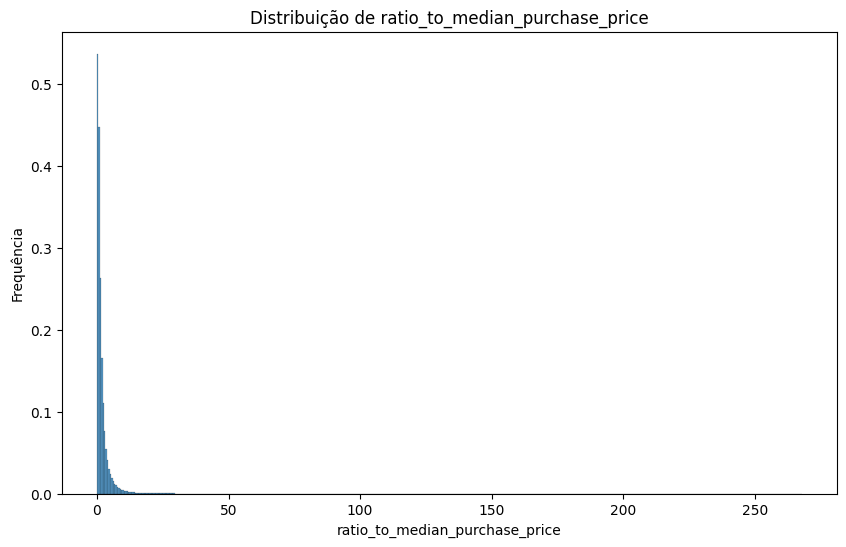

In [57]:
ratio_to_median_purchase_price = 'ratio_to_median_purchase_price'

if ratio_to_median_purchase_price in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[ratio_to_median_purchase_price], bins=500, stat="density")
    plt.title(f'Distribuição de {ratio_to_median_purchase_price}')
    plt.xlabel(ratio_to_median_purchase_price)
    plt.ylabel('Frequência')
    plt.show()

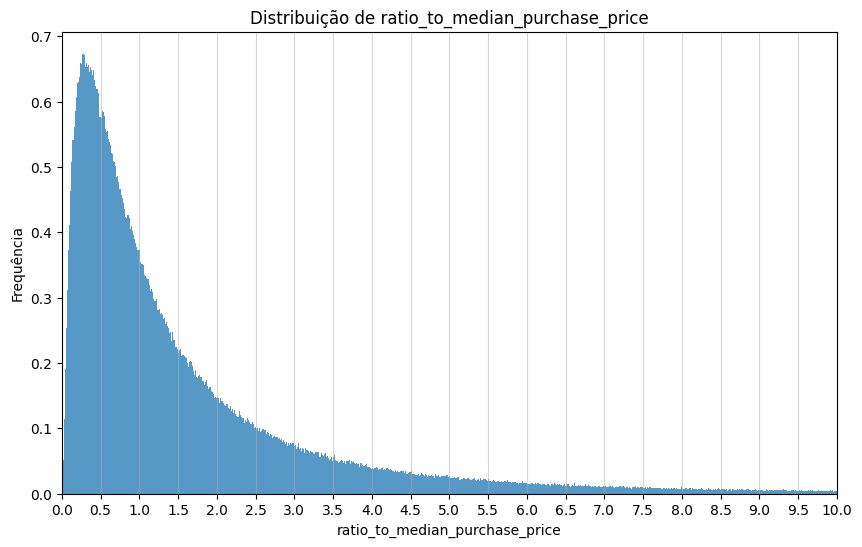

In [64]:
# Aqui vai ser o mesmo grafico mas com um "zoom". Ele so vai plotar graficos para valores entre 0 e 10

ratio_to_median_purchase_price = 'ratio_to_median_purchase_price'

if ratio_to_median_purchase_price in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[ratio_to_median_purchase_price], bins=20000, stat="density")
    plt.title(f'Distribuição de {ratio_to_median_purchase_price}')
    plt.xlabel(ratio_to_median_purchase_price)
    plt.ylabel('Frequência')
    plt.xlim(0, 10) # AQUI VAI DAR ZOOM NO GRAFICO PRA GENTE VER SO UMA PARTE
    plt.xticks(np.arange(0, 10.5, 0.5)) # aqui aumenta a precisao do X axis
    plt.grid(axis='x', alpha=0.5)
    plt.show()

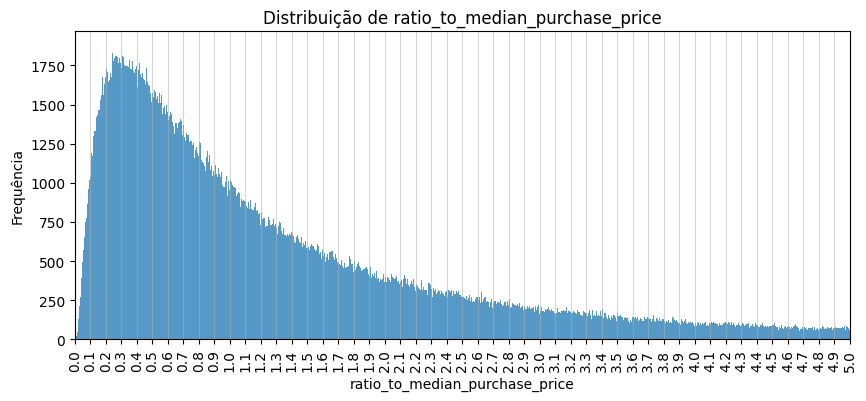

In [62]:
if ratio_to_median_purchase_price in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[ratio_to_median_purchase_price], bins=100000)
    plt.title(f'Distribuição de {ratio_to_median_purchase_price}')
    plt.xlabel(ratio_to_median_purchase_price)
    plt.ylabel('Frequência')
    plt.xlim(0, 5) # AQUI VAI DAR ZOOM NO GRAFICO PRA GENTE VER SO UMA PARTE
    plt.xticks(np.arange(0, 5.1, 0.1), rotation=90) # aqui aumenta a precisao do X axis
    plt.grid(axis='x', alpha=0.5)
    plt.show()

# Interpretação do Histograma 1

O histograma mostra que a maioria das compras tem um valor próximo de 0.3 vezes o valor médio de compras.
A quantidade de compras diminui muito a partir de 0.5 vezes e começa a tender à 0 a partir de 3 vezes.

---

# Parte 3: Conectando os Pontos - Relação entre Variáveis

Antes de gerar o scatter plot, discutam e respondam:

---
7. Vamos escolher duas variáveis numéricas que acreditamos estar relacionadas (ex:  área_do_imóvel  e  preço ). Qual é a nossa hipótese sobre a direção e a força dessa relação? (Ex: "Acreditamos que quanto maior a área, maior o preço" - uma relação positiva e forte).

**-Resp.:** Variáveis escolhidas: distance_from_home (Distância física entre a compra atual e a residência do titular) e distance_from_last_transaction (Distância física entre a compra atual e à compra anterior do cartão). Acreditamos que os dados estarão muito próximos nos valores baixos mas vão se distanciando conforme os valores vão subindo.

---
8. Se o nosso scatter plot não mostrar nenhuma relação clara (apenas uma "nuvem de pontos" aleatória), o que isso nos diz? Significa que as variáveis não têm relação, ou que a relação pode ser mais complexa e não-linear?

**-Resp.:** Isso nos diz que a relação entre os dados é fraca. Não significa que não há relação, apenas significa que a relação não é tão simples nem tão linear.

---
9. O que um "ponto" isolado e muito distante dos outros (um outlier) em um scatter plot representa em termos práticos para o nosso problema? (Ex: "um imóvel muito pequeno e extremamente caro").

**-Resp.:** No nosso caso, não significa nada, pois o titular do cartão pode ter viajado para um país longe.

---


# Scatter Plot

# Scatter Plot 1: Como que a "Distância física entre a compra atual e a residência do titular" se relaciona à "Distância física entre a compra atual e à compra anterior do cartão"

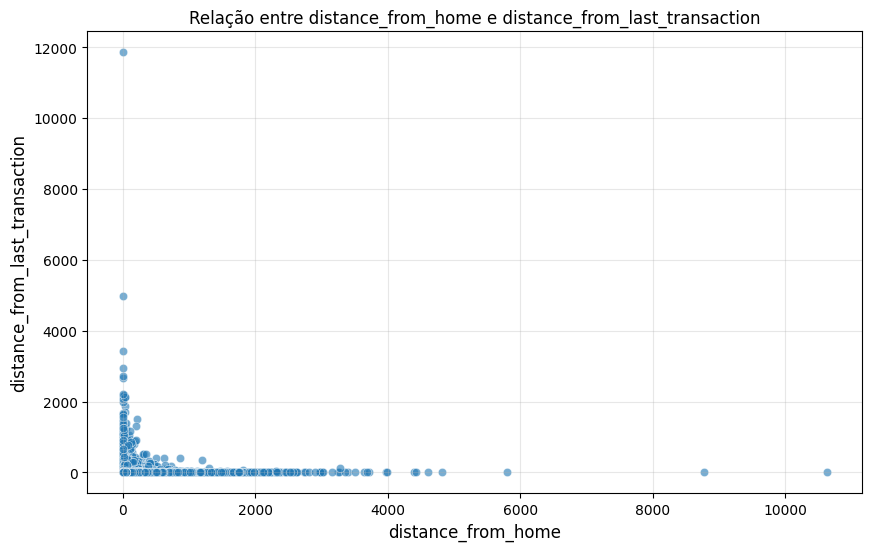

In [76]:
distance_from_home = 'distance_from_home'
distance_from_last_transaction = 'distance_from_last_transaction'

var_x = distance_from_home
var_y = distance_from_last_transaction

if var_x in df.columns and var_y in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[var_x], y=df[var_y], alpha=0.6)
    plt.title(f'Relação entre {var_x} e {var_y}')
    plt.xlabel(var_x, fontsize=12)
    plt.ylabel(var_y, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

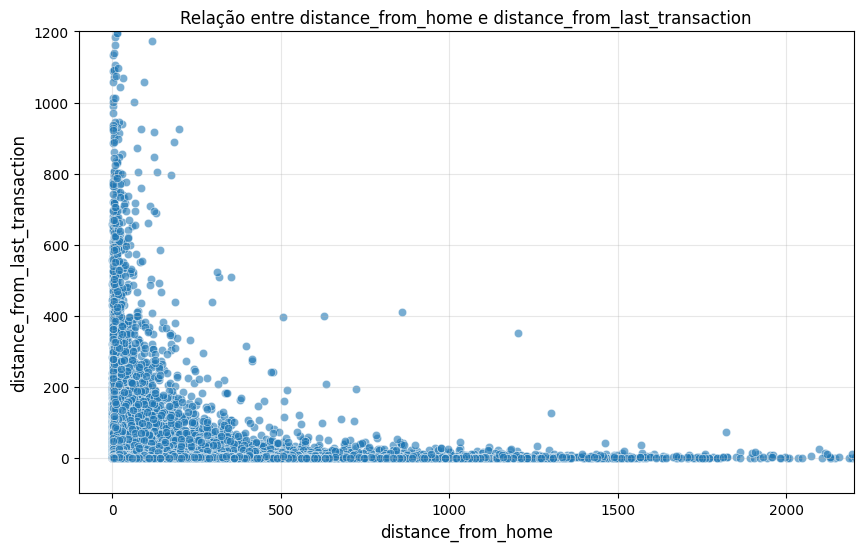

In [83]:
# zoom para ver melhor

if var_x in df.columns and var_y in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[var_x], y=df[var_y], alpha=0.6)
    plt.title(f'Relação entre {var_x} e {var_y}')
    plt.xlabel(var_x, fontsize=12)
    plt.ylabel(var_y, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xlim(-100, 2200)
    plt.ylim(-100, 1200)
    plt.show()

# Interpretação do Scatter Plot 1
### Pergunta: Como que a a distancia fisica entre a compra atual e a ultima compra se comparam a distancia fisica entre a compra atual e o endereço do titular.

**-Resp.:** Percebemos que a maioria dos dados fica extremamente próximo ao valor 0 ou no eixo X ou no eixo Y. Isso indica que as compras seguem uma de duas opções, ou elas são muito próximas a casa do titular, ou são agrupadas, mesmo que distante da casa. São raros os pontos longe de casa e longe da compra anterior, já que esses, na nossa visão, só acontecem na primeira compra de uma viagem ou em fraudes.


---

# Antes de gerar o boxplot, discutam:

10. Vamos comparar uma variável numérica ( valor_gasto ) entre duas ou mais categorias ( plano_de_assinatura ). Qual categoria nós hipotetizamos que terá a média ou mediana mais alta? Por quê?

**-Resp.:** Variável númerica escolhida: ratio_to_median_purchase_price (Razão entre o preço da compra atual e o preço médios das compras passadas daquele cartão). Variaveis binárias (categorias) escolhidas: Uso de chip (se o cartão foi inserido) e uso de senha (se foi colocada a senha para aprovar a compra). Acreditamos que o uso de senha terá media e mediana mais alta, pois geralmente os cartões tem um valor limite para pedir senha. Considerando que a média de valores das compras de uma pessoa seja 50 reais e que seu cartão pede senha a partir de 200 reais, um compra de 4 vezes o valor médio precisaria de senha.

---
11. O que a "altura da caixa" (o intervalo interquartil) em um boxplot nos diz sobre os dados de uma categoria? Por que uma caixa "alta" para a categoria "Plano Premium" e uma caixa "baixa" para o "Plano Básico" seria um insight interessante?

**-Resp.:** A altura da caixa em um boxplot nos indica o quão "grande" o agrupamento de dados é. Por exemplo, uma altura baixa significa que os dados são bem condensados, enquanto um altura alta significa que os dados se espalham mais. Isso não pode ser confundido com as "bolinhas", que indicam os *outliers*, ou seja, os valores discrepantes. No nosso caso, uma caixa muito alta na categoria Uso de Senha, indicaria que nossa tese está errada, pois indicaria que se usa senha em muitos valores diferentes.

---
12. Se um boxplot mostra que a mediana entre duas categorias é quase a mesma, mas uma delas tem "bigodes" (whiskers) muito mais longos e vários outliers, qual é a história que os dados estão contando sobre a consistência vs. a variabilidade do comportamento em cada grupo?

**-Resp.:** A mediana parecida indica que os valores centrais são próximos nas duas categorias, enquanto os bigodes indicam o quão variável a categoria é. Um bigode longo indica mais variedade enquanto um bigode curto indica menos variedade.


----

# Boxplots

# Boxplot 1: Relação entre razão da compra atual em relação ao preço médio e uso de senha.

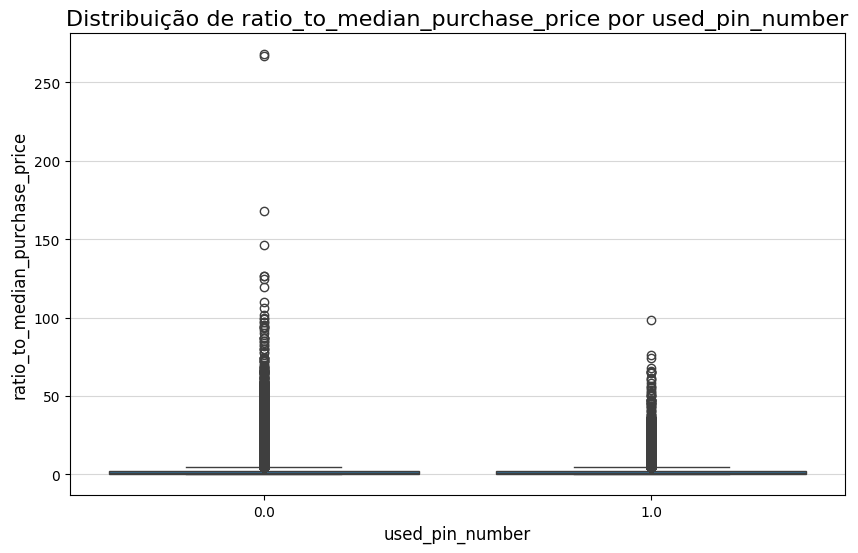

In [85]:
var_categoria = 'used_pin_number'
var_numerica = 'ratio_to_median_purchase_price'

if var_categoria in df.columns and var_numerica in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var_categoria], y=df[var_numerica])
    plt.title(f'Distribuição de {var_numerica} por {var_categoria}', fontsize=16)
    plt.xlabel(var_categoria, fontsize=12)
    plt.ylabel(var_numerica, fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()


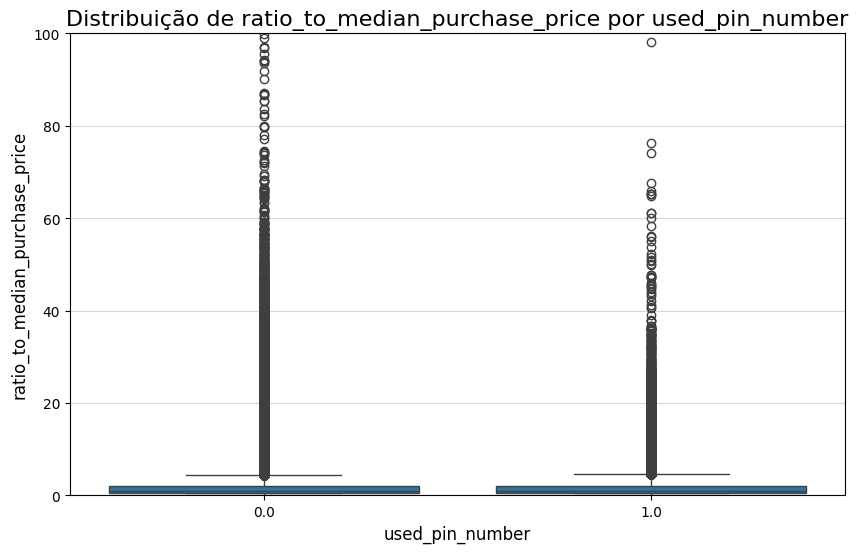

In [89]:
if var_categoria in df.columns and var_numerica in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var_categoria], y=df[var_numerica])
    plt.ylim(0, 100)
    plt.title(f'Distribuição de {var_numerica} por {var_categoria}', fontsize=16)
    plt.xlabel(var_categoria, fontsize=12)
    plt.ylabel(var_numerica, fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

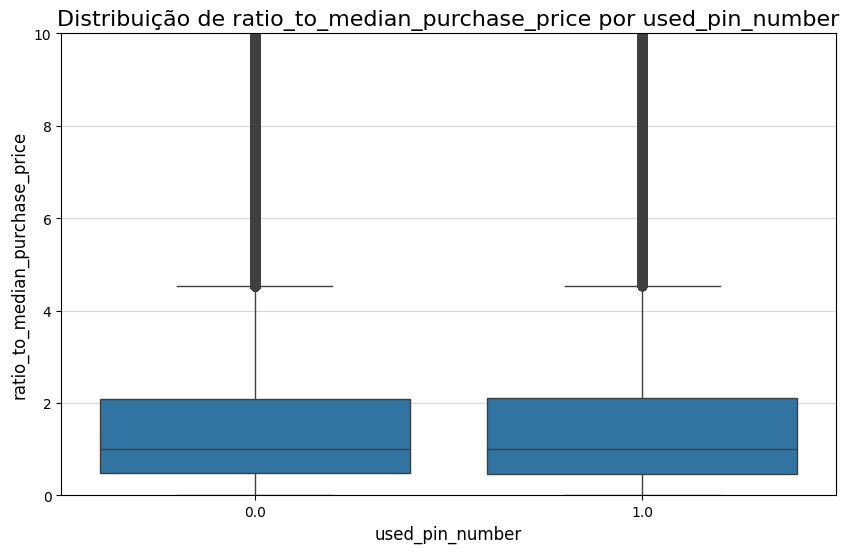

In [91]:
if var_categoria in df.columns and var_numerica in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var_categoria], y=df[var_numerica])
    plt.ylim(0, 10)
    plt.title(f'Distribuição de {var_numerica} por {var_categoria}', fontsize=16)
    plt.xlabel(var_categoria, fontsize=12)
    plt.ylabel(var_numerica, fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

# Interpretação do Boxplot 1:

Chegamos a conclusão de que nossa tese, que dizia que compras em valores elevados usam senha, estava errada. Não apenas isso, como a realidade é o oposto do que imaginávamos, pois o boxplot nos mostra que compras de valores muito elevados não utilizaram senha.

---

# Boxplot 2 (Extras)

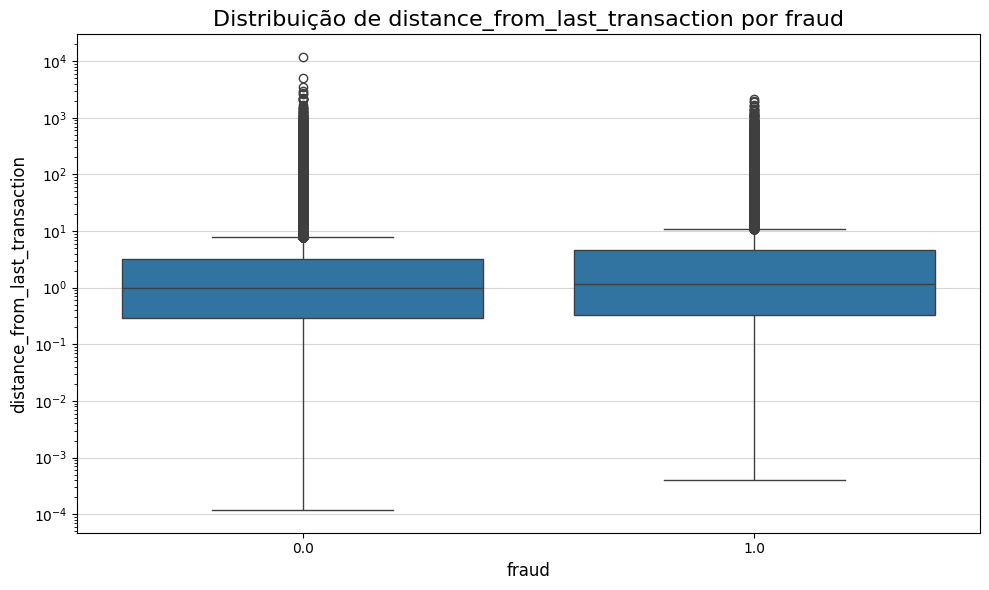

In [110]:
if var_categoria in df.columns and var_numerica in df.columns:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var_categoria], y=df[var_numerica], showfliers=True)

    plt.yscale('log')
    plt.title(f'Distribuição de {var_numerica} por {var_categoria}', fontsize=16)
    plt.xlabel(var_categoria, fontsize=12)
    plt.ylabel(var_numerica, fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()

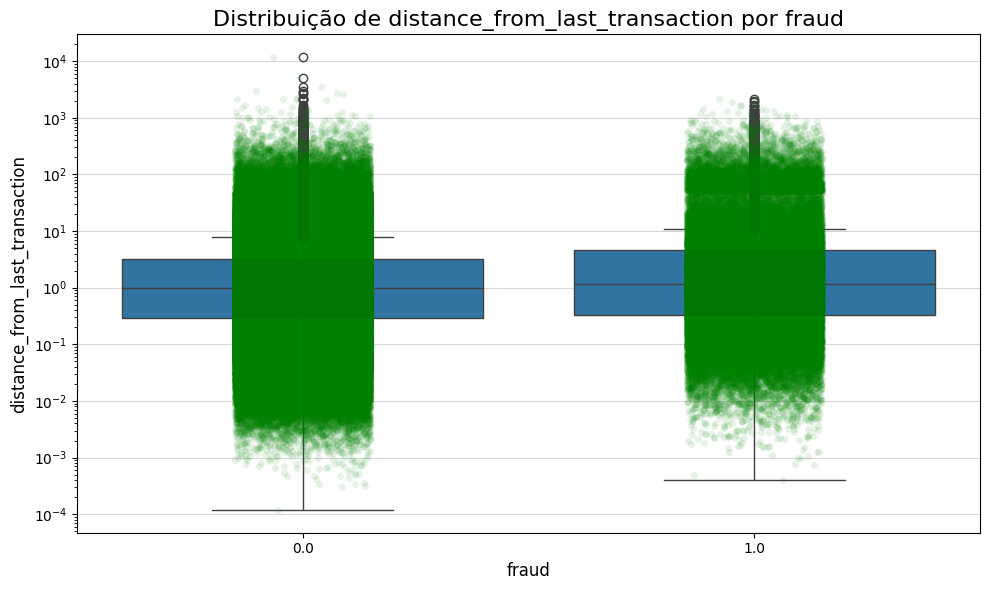

In [114]:
if var_categoria in df.columns and var_numerica in df.columns:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var_categoria], y=df[var_numerica], showfliers=True)
    sns.stripplot(x=df[var_categoria], y=df[var_numerica],
                  color='green', alpha=0.1, jitter=0.15)

    plt.yscale('log')
    plt.title(f'Distribuição de {var_numerica} por {var_categoria}', fontsize=16)
    plt.xlabel(var_categoria, fontsize=12)
    plt.ylabel(var_numerica, fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Interpretação do Boxplot 2 (Extra):

Esse nos mostrou que fraudes costumam ter um valor um pouco mais elevado do que compras legítimas.